In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diamonds.csv')
df = df.dropna()

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
import seaborn as sns

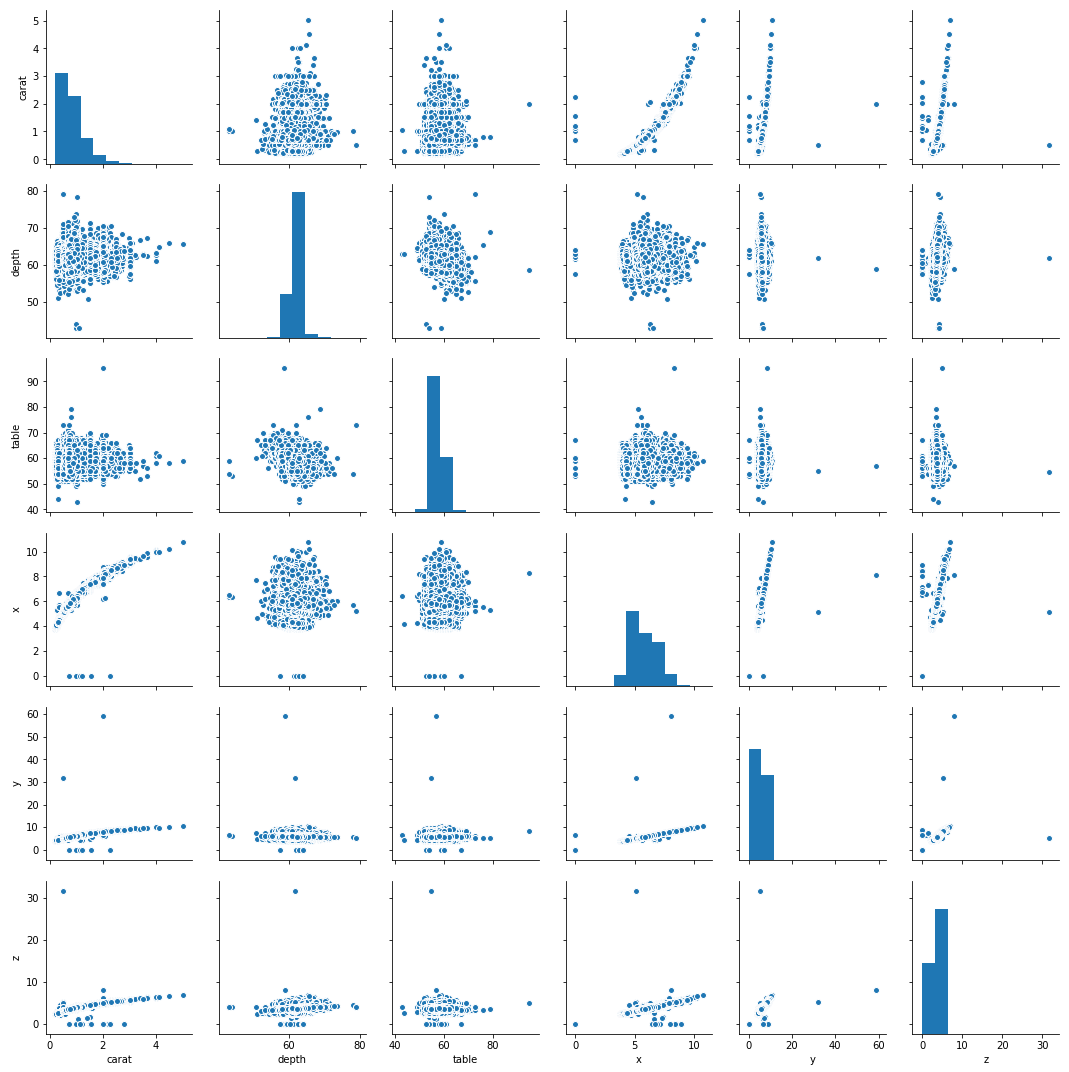

In [6]:
g = sns.pairplot(df.drop(['price', 'clarity', 'color', 'cut'], axis=1))

In [7]:
g

In [8]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = df.drop(['price', 'clarity', 'color', 'cut'], axis=1)
Y = df.price
knn.fit(X, Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: -0.86 (+/- 1.79)


In [10]:
from sklearn import linear_model

# Instantiate our model.
regr = linear_model.LinearRegression()
Y=df.price.values.reshape(-1,1)

# Fit our model to our data.
regr.fit(X, Y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

from sklearn.model_selection import cross_val_score
score = cross_val_score(regr, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Coefficients: 
 [[10686.30908063  -203.1540524   -102.44565213 -1315.6678418
     66.32160232    41.62769701]]
Intercept: 
 [20849.31641304]
Accuracy: -0.67 (+/- 2.81)


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=5)

array([-0.43788508,  0.36764073,  0.73302822, -3.26469605, -0.74091918])

The KNN Regression model seems to outperform the ordinary least squares regression.  This is shown by the much lower standard deviation for the KNN regression model than for the OLS model.  The least squares model seems to have a difficult time generalizing the data to create a prediction model.  The KNN model seems to handle price predictions for diamonds of different carats much better.  The OLS model does outperform the KNN model with mean score, but the difference is rather small, and the underperformance in standard deviation far outweighs this one area where the OLS performs better.

Use of feature engineering with the categorical data would greatly improve performance of the KNN model and make it more usable.  The data that was used made it difficult for an OLS model to predict diamond price.  Prices do not change linearly with change in diamond attributes.